In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset("tips")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [8]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [9]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [10]:
df["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

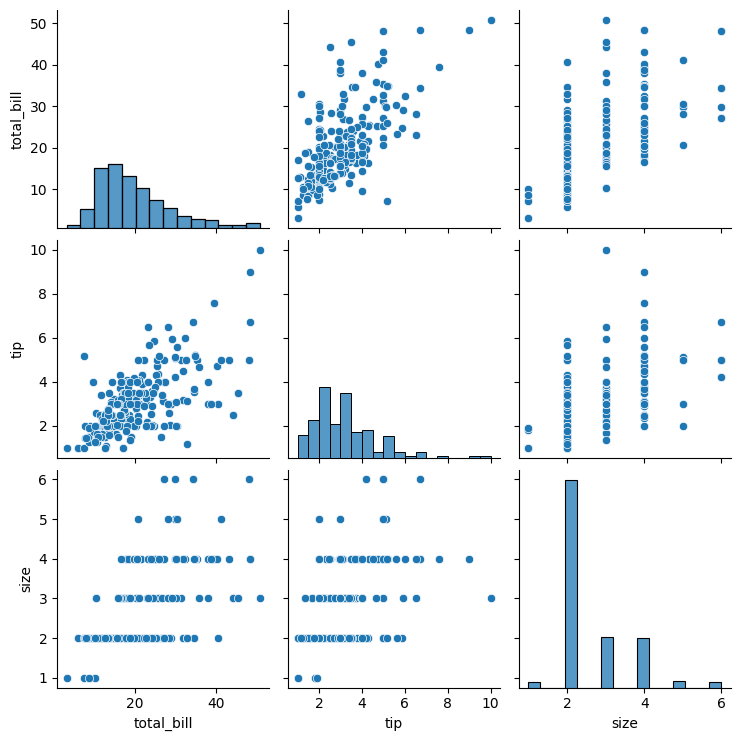

In [11]:
sns.pairplot(df)

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
scalar = StandardScaler()
onehot_encoder = OneHotEncoder(drop="first")
label_encoder = LabelEncoder()

In [13]:
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df["time"] = label_encoder.fit_transform(df["time"])
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3
3,23.68,3.31,1,0,Sun,0,2
4,24.59,3.61,0,0,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,0,3
240,27.18,2.00,0,1,Sat,0,2
241,22.67,2.00,1,1,Sat,0,2
242,17.82,1.75,1,0,Sat,0,2


In [14]:
df1 = onehot_encoder.fit_transform(df[["day"]]).toarray()
df2 = pd.DataFrame(df1, columns= onehot_encoder.get_feature_names_out())
concat_df = pd.concat([df,df2], axis=1)
concat_df.drop(columns=["day"], inplace=True)

In [15]:
df = concat_df
df

,total_bill,tip,sex,smoker,time,size,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,0,0,2,0.0,1.0,0.0
1,10.34,1.66,1,0,0,3,0.0,1.0,0.0
2,21.01,3.50,1,0,0,3,0.0,1.0,0.0
3,23.68,3.31,1,0,0,2,0.0,1.0,0.0
4,24.59,3.61,0,0,0,4,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,0,3,1.0,0.0,0.0
240,27.18,2.00,0,1,0,2,1.0,0.0,0.0
241,22.67,2.00,1,1,0,2,1.0,0.0,0.0
242,17.82,1.75,1,0,0,2,1.0,0.0,0.0


<Axes: >

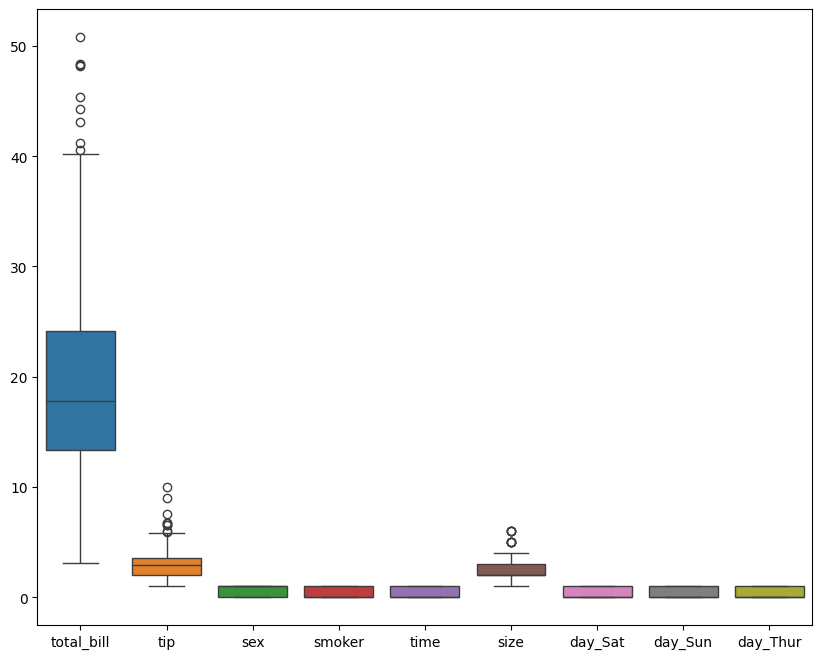

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(concat_df)

In [17]:
x = df.iloc[:,1:]
x

,tip,sex,smoker,time,size,day_Sat,day_Sun,day_Thur
0,1.01,0,0,0,2,0.0,1.0,0.0
1,1.66,1,0,0,3,0.0,1.0,0.0
2,3.50,1,0,0,3,0.0,1.0,0.0
3,3.31,1,0,0,2,0.0,1.0,0.0
4,3.61,0,0,0,4,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
239,5.92,1,0,0,3,1.0,0.0,0.0
240,2.00,0,1,0,2,1.0,0.0,0.0
241,2.00,1,1,0,2,1.0,0.0,0.0
242,1.75,1,0,0,2,1.0,0.0,0.0


In [18]:
y = df["total_bill"]
y

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=30, random_state=42)

In [20]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [21]:
from sklearn.svm import SVR
svr = SVR()

In [22]:
svr.fit(x_train_scaled,y_train)

SVR()

In [23]:
y_pred = svr.predict(x_test)
y_pred

c:\Users\rauna\codes\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


array([26.60487793, 26.86401749, 23.81669969, 21.53101375, 25.3274516 ,
       25.90807408, 24.61328403, 26.39637186, 25.90939485, 26.25953405,
       26.22786678, 26.43292756, 26.10048361, 25.90807408, 25.63390534,
       25.71363261, 22.71569909, 24.77634267, 27.66946581, 21.158774  ,
       24.13201029, 24.96389093, 24.79134714, 26.4021235 , 23.8270401 ,
       25.72471528, 26.74098917, 23.28253529, 23.81669969, 20.70153917])

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"mean_squared_error = {mse}")
print(f"mean_absolute_error = {mae}")
print(f"r2_score = {r2}")

mean_squared_error = 143.2135066800242
mean_absolute_error = 10.231769651940818
r2_score = -0.8921991526014208


In [28]:
from sklearn.model_selection import GridSearchCV

para_grid = {"C":[0.1,1,10,100,1000],
             "gamma" : [1,0.1,0.01,0.001,0.0001],
             "kernel" :["rbf","linear"]}

In [29]:
grid = GridSearchCV(SVR(),param_grid=para_grid, refit=True,verbose=3)
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.030 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.022 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.132 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.490 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.543 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.506 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.418 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.358 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.077 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [32]:
y_pred = grid.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"mean_squared_error = {mse}")
print(f"mean_absolute_error = {mae}")
print(f"r2_score = {r2}")

mean_squared_error = 433.84703028511495
mean_absolute_error = 19.805118678532505
r2_score = -4.732175701124999


c:\Users\rauna\codes\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
